In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

In [47]:
# فایل CSV رو بخون
data = pd.read_csv("rounded_hours_student_scores.csv")

In [48]:
# ستون‌ها رو جدا کن
x_train = data["Hours"].values  # ساعت مطالعه
y_train = data["Scores"].values # نمره

In [49]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [1.1 1.2 1.4 1.5 1.6]


In [50]:
#print y_train
print("Type of y_train",type(y_train))
print("First five elements of the y_train are:\n", y_train[:5])

Type of y_train <class 'numpy.ndarray'>
First five elements of the y_train are:
 [41 40 38 39 36]


In [51]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (60,)
The shape of y_train is:  (60,)
Number of training examples (m): 60


In [14]:
print(data.head())  # برای چک کردن

   Hours  Scores
0    1.1      41
1    1.2      40
2    1.4      38
3    1.5      39
4    1.6      36


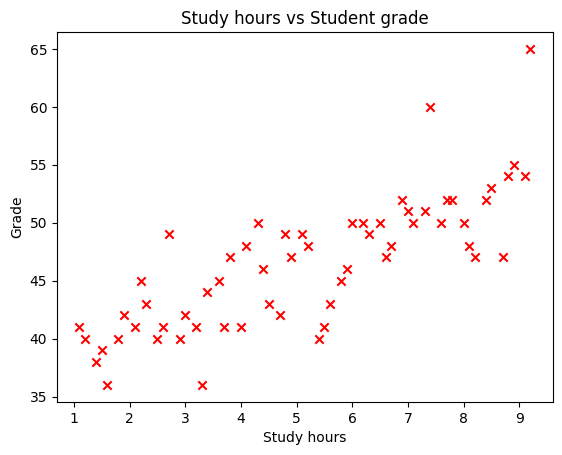

In [52]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Study hours vs Student grade")
plt.xlabel("Study hours")
plt.ylabel("Grade")
plt.show()

In [53]:
def compute_cost(X, y, w, b):
    """
    here we compute the cost function for the linear regression
    as we already know the formula for prediction is: f_wb=w.x+b
    but the cost function has error term in order to make that we need a loop:
    (f_wb-y)**2/m
    """
    m = X.shape[0]  # number of training examples
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b   # prediction
        cost += (f_wb_i - y[i])**2     # squared error

    cost = cost / (2*m)
    return cost

In [54]:
initial_w = 1.1
initial_b = 40.90
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')

Cost at initial w: 7.590


In [55]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameter w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """

    # Number of training examples
    m = x.shape[0]

    # Initialize gradients
    dj_dw = 0
    dj_db = 0

    ### START CODE HERE ###
    # Loop over examples
    for i in range(m):  
        # prediction for i-th example
        f_wb = w * x[i] + b   

        # error
        err = f_wb - y[i]

        # gradient contribution from i-th example
        dj_dw_i = err * x[i]
        dj_db_i = err

        # accumulate
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    # Average over all examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    ### END CODE HERE ### 

    return dj_dw, dj_db

In [56]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -249.88166666666663 -46.43333333333333


In [57]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -242.41213333333337 -45.20333333333333


In [58]:
# تابع گرادیان دیسنت
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # آپدیت پارامترها
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # ذخیره cost
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        # پرینت در هر چند مرحله
        if i % math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
    
    return w, b, J_history, w_history

# ----------- تست روی دیتای نمونه -------------
# داده آموزشی
x_train = np.array([1.0, 2.0, 3.0, 4.0])   # مثلا ساعت مطالعه
y_train = np.array([2.0, 2.5, 4.0, 4.5])   # مثلا نمره دانشجو

# مقادیر اولیه
initial_w = 0.
initial_b = 0.
iterations = 1500
alpha = 0.01

# اجرای گرادیان دیسنت
w, b, J_history, w_history = gradient_descent(x_train, y_train,
                                              initial_w, initial_b,
                                              compute_cost, compute_gradient,
                                              alpha, iterations)

print("\nFinal w,b found by gradient descent:\n", w, b)


Iteration    0: Cost     4.89
Iteration  150: Cost     0.05
Iteration  300: Cost     0.04
Iteration  450: Cost     0.03
Iteration  600: Cost     0.03
Iteration  750: Cost     0.03
Iteration  900: Cost     0.03
Iteration 1050: Cost     0.03
Iteration 1200: Cost     0.03
Iteration 1350: Cost     0.03

Final w,b found by gradient descent:
 0.9223602918525887 0.9342580151899068


In [59]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Study hours')

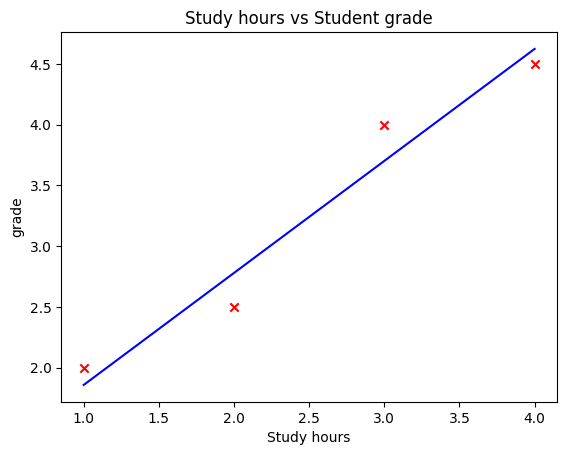

In [60]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Study hours vs Student grade")
# Set the y-axis label
plt.ylabel('grade')
# Set the x-axis label
plt.xlabel('Study hours')

In [61]:
predict1=1*w+b
print(f'The score is probably around {predict1:.2f}')

The score is probably around 1.86
